# Mandatory exercise 
Karl Jacobsen

# I 
Suppose a non-life insurance company has responsibility for a portfolio of $J = 1, 000$ policies. Assume further that the number of claims $N$ is Poisson distributed with intensity $μ = 0.05$, and that the claim sizes $Z$ i follow a Pareto with $E(Z_i) = 1.9$ and $sd(Z_i) = 2, 3, 4.$
## Ia) 
__Q:__ Find the parameters $\alpha$ and $\beta$ of the Pareto distribution for each of the three values of $sd(Z_i)$ and plot the probabilitydensity function of each of the three distributions. <br>

__A:__ We use the method of moments. We have given empirical values for the mean and standard deviation. For the Pareto distribution we know that

\begin{align}
    E(Z) = \xi(\alpha, \beta) = \frac{\beta}{\alpha -1}\\
    sd(Z) = \sigma (\alpha, \beta) = E(Z) \sqrt{\frac{\alpha}{\alpha -2}}
\end{align}

Now we match our empirical values, which I will name as $\overline{z}$ and $s$ for the mean and std, with the theoetical values from above

\begin{align}
    \frac{\beta}{\alpha -1}= \overline{Z} \\
    \frac{\beta}{\alpha -1} \sqrt{\frac{\alpha}{\alpha -2}} &= s
\end{align}

These are two equations in two unknown. Solving for the two unknowns gives

\begin{align}
    \alpha &= \frac{2(s/\overline{z})^2}{(\frac{\overline{z}}{s})^2-1} \\
    \beta &= (\alpha -1) \overline{z}
\end{align}

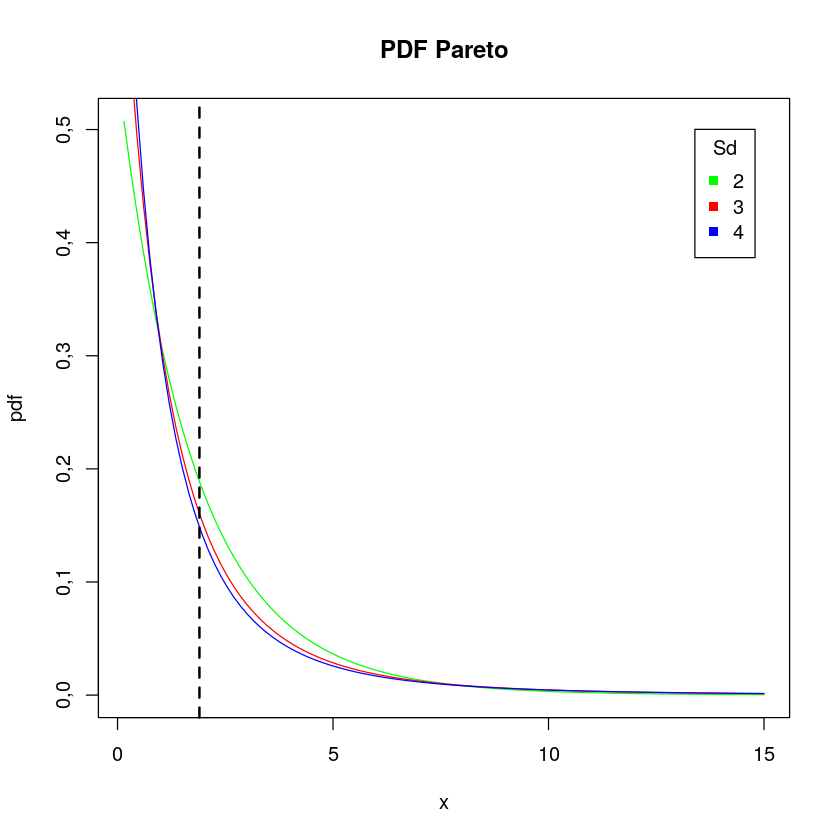

In [8]:
pdfPareto = function(avg, sd, x){
    "Calculates the pdf of the Pareto distribution
     for given empirical values of the mean and 
     the std."
    r2 = (sd/avg)^2.
    alpha = 2.*r2/(r2 - 1.)
    beta = (alpha - 1)*avg
    f = (alpha/beta)/(1 + x/beta)^(alpha + 1)
    return(list(alpha, beta, f))
}

# Calculate and plot the Pareto pdf for different sds.
avg = 1.9
sds = c(2,3,4)
colors <- c("green", "red", "blue")
x = 1:100*.15
counter = 1
for (sd in sds){
    out = pdfPareto(avg, sd, x)
    pdf = unlist(out[3])
    if (counter == 1){
        plot(x, pdf, 'l', col=colors[counter])
    }
    else{
        lines(x, pdf, col=colors[counter])
    }
    counter = counter + 1
}
legend("topright", inset=.05, title="Sd", legend=sds, pch=15, col = colors);
abline(v = avg, lty=2, lwd=2)
title('PDF Pareto')

In the above figure, which shows the PDF of the Pareto distribution for different standard deviations, we see that the right tail weight is reduced with higher standard deviation. For values larger than the average, which is shown with the dotted vertical line, the area below the line for the lowest standard deviation is largest. This was not expected, as I would think that larger standard deviation gave higer probability for the largst values.

## Ib)
__Q:__ Compute the 95% and 99% reserve for this portfolio for each of the three
sets of parameters.<br>

__A:__ We solve the task by use of MC simulations, and algorithm 3.1 in Bølviken (2014). In the calculations I use the same number of MC cycles, $m$, as the number of policies, $J$. Hence $m$ in the program is used for both the number of MC cycles and the number of claims.

In [45]:
portFolioRisk = function(m, lambda, alpha, beta, exact){
    "Calculates mean and std of portfolio with
     Poisson distributed claim number and Pareto
     distributed claim sizes by use of MC.

     Exact values for mean and std are also computed."
    
    X = 1:m*0
    N = rpois(m, lambda*m)
    for (i in 1:m){
        U = runif(N[i])
        Z = beta*(U**(-1/alpha) - 1)
        X[i] = sum(Z)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = m*lambda*1*beta/(alpha - 1)
    exactSd = beta/(alpha-1)*sqrt(m*lambda*1*(2*alpha - 2)/(alpha - 2))
    avgEmpirical = beta/(alpha - 1)
    sdEmpirical = avgEmpirical*(alpha/(alpha - 2))^.5
    print('######################################################################')
    print(c('Std: ', sdEmpirical))

    if (exact==1){
        print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    }
    
    return(list(numericalMean, numericalSd, X))
}

alphaBeta = function(avg, sd){
    "Calculates alpha and beta for the Pareto
     distribution given known empirical mean
     and std."
    r2 = (sd/avg)^2.
    alpha = 2.*r2/(r2 - 1.)
    beta = (alpha - 1)*avg
    return(list(alpha, beta))
}

simulateMultipleSd = function(sds){
    "Simulation of portfolio loss using the function portFolioRisk
     for different values of std. 

     Prints ratios of simulated to exact values for mean and std.

     Prints the claim values corresponding to the 95% and 99%
     percentiles."
    
    for (sd in sds){
        out = alphaBeta(avg, sd)
        alpha = unlist(out[1])
        beta = unlist(out[2])    
        out = portFolioRisk(m, lambda, alpha, beta, exact)
        meanSim = unlist(out[1])
        sdSim = out[2]
        X = unlist(out[3])

        epsilon = c(0.05, 0.01)
        qEpsilon = sort(X)[(1-epsilon)*m]
        print(c('Percentile 95%, 99%: ', qEpsilon))
        #plot(density(X))
        #abline(v = qEpsilon[1], lty=2, lwd=2)
        #abline(v = qEpsilon[2], lty=2, lwd=2)
    }
}

# Input
avg = 1.9
sds = c(2.,3.,4.)
m = 1000
lambda = .05
exact=1

# Simulate
simulateMultipleSd(sds)

[1] "######################################################################"
[1] "Std: " "2"    
[1] "numSd/exact"      "1,04605966135886" "numMean/exact"    "1,01058966778797"
[1] "Percentile 95%, 99%: " "131,827032291039"      "147,398766100055"     
[1] "######################################################################"
[1] "Std: " "3"    
[1] "numSd/exact"       "0,962465814965304" "numMean/exact"    
[4] "1,01287024074134" 
[1] "Percentile 95%, 99%: " "137,056354362537"      "159,51645921701"      
[1] "######################################################################"
[1] "Std: " "4"    
[1] "numSd/exact"      "1,02214938663784" "numMean/exact"    "1,00386381051667"
[1] "Percentile 95%, 99%: " "153,333221008457"      "192,847474915487"     


First we see that the MC method gives the correct mean and std's in all cases. The ratio of the numerical to exact values for the mean and std's are close to one in all cases. <br>

We se that the reserve values, represented by the percentile values in the print out, increases with the standard deviation. It was expected that the reserves increase with the standard deviation. A higher stadnard deviation gives more uncertainty in the form of volatility. More volatility increases the chances of extreme events. Hence the upper percentile valuese increase.

## Ic)
__Q:__
Assume now that parts of the responsibility is ceded to a reinsurer. The
reinsurance contract, which is a layer a × b contact, applies to the individual claims $Z_i$ . Compute the 95% and 99% reserve for the cedent when
$a = 0.5$ and $b = 4$, again for each of the three sets of parameters, and compare to the results from b). Also compute the corresponding reinsurance
premia and comment on the results. <br>

__A:__ We solve this by the MC method. The a x b scheme is given in p. 62 in Bøviken (2014) as

\begin{equation}
H(z) =
\begin{cases} 
    0 & \text{if $z \leq a$}, \\
    z-a & \text{if $a < z \leq a+b$}, \\
    b & \text{if $z>a+b$}
\end{cases}
\end{equation}

The solution algorithm is almost identical to the previously used one for the total claims. The difference is that the above equation is applied for each MC cycle.

In [40]:
reinsurance = function(m, lambda, alpha, beta, a, b){
    "Computes the total and the reinsurance claims of  
     an axb contract when the claim sizes are Pareto 
     distributed and the claim number is Poisson
     distributed.

     Mean and standard deviation of the cedent claims
     are returned.
     
     The fair reinsurance premium is returned."
    
    X = 1:m*0
    Xre = 1:m*0
    N = rpois(m, lambda*m)
    for (i in 1:m){
        U = runif(N[i])
        Z = beta*(U**(-1/alpha) - 1)
        Zre = pmin(pmax(Z-a, 0), b)
        Xre[i] = sum(Zre)
        X[i] = sum(Z - Zre)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    reinsurancePremium = mean(Xre)
    avgEmpirical = beta/(alpha - 1)
    sdEmpirical = avgEmpirical*(alpha/(alpha - 2))^.5
    print('######################################################################')
    print(c('Std: ', sdEmpirical))
    return(list(numericalMean, numericalSd, X, reinsurancePremium))
}

simulateMultipleSdCedent = function(sds){
    "Runs the reinsurance calculations for 
     different std's.

     Prints the reinsurance premuim, the mean 
     cedent claim size, and the 95 and 99 % 
     percentiles of the cedent's claims."
    
    for (sd in sds){
        out = alphaBeta(avg, sd)
        alpha = unlist(out[1])
        beta = unlist(out[2])    
        out = reinsurance(m, lambda, alpha, beta, a, b)
        meanSim = unlist(out[1])
        sdSim = out[2]
        X = unlist(out[3])
        reinsurancePremium = unlist(out[4])

        epsilon = c(0.05, 0.01)
        qEpsilon = sort(X)[(1-epsilon)*m]

        print(c('95 %, 99% percentile cedent: ', qEpsilon))
        print(c('Reinsurance premium: ', reinsurancePremium))
        print(c('Mean cedent claims cedent: ', meanSim))
        #plot(density(X))
        #abline(v = qEpsilon[1], lty=2, lwd=2)
        #abline(v = qEpsilon[2], lty=2, lwd=2)
    }
}

# Input
a = 0.5
b = 4

# Simulate
simulateMultipleSdCedent(sds)

[1] "######################################################################"
[1] "Std: " "2"    
[1] "95 %, 99% percentile cedent: " "46,2839315398227"             
[3] "53,6095735431289"             
[1] "Reinsurance premium: " "63,4034894679123"     
[1] "Mean cedent claims cedent: " "32,1897999297611"           
[1] "######################################################################"
[1] "Std: " "3"    
[1] "95 %, 99% percentile cedent: " "68,6538281386863"             
[3] "100,254450081767"             
[1] "Reinsurance premium: " "55,5731267074151"     
[1] "Mean cedent claims cedent: " "39,6419586439016"           
[1] "######################################################################"
[1] "Std: " "4"    
[1] "95 %, 99% percentile cedent: " "83,2259558788938"             
[3] "143,91490745567"              
[1] "Reinsurance premium: " "51,6938120368091"     
[1] "Mean cedent claims cedent: " "43,4500307803226"           


Reserves are much lower compared to the case without reinsurance. It was expected that the percentile values would decrease with reinsurance. With resinsurance parts of the losses are transferred away from the cedent and to the reinsurer. Hence the losses for the cedent is reduced. <br>

The reinusrance premium goes down with sd, and this <mark> I did not expect <mark>. With large sd, there will be more claims in the reinsurance contract that exceeds the maximum amount $b$. The excess over $b$ has to be carried out by the cedent. This would increase the cedent's claims. However, I do not see that this should reduce the claims of the reinsurer.  

# II
Consider a pension that starts at age $l_r = 67$, with $l_0$ the age when the
contract is set up. Further assume that the sum $s = 1.5$ is received at the
start of each year until the age $l_e = 100$. In return, a premium $\pi$ is paid at
the beginning of each year before retirement. A fixed technical rate $r$ is used
for the discounts. The probability of an individual of age $l$ living at least $k$
periods longer is $_k p_l$ , and is assumed to be given by 

\begin{align}
    \log(_k p_l) = \theta_0 k - \frac{\theta_1}{\theta_2} (e^{\theta_2 k} -1) e^{\theta_2 l},
\end{align}

with $\theta_0 = 0.009$, $\theta_1 = 0.000046$ and $\theta_2 = 0.0908$. The expected present value of the cash flow associated with this contract
is then given by

\begin{align}
    V_0 = -\pi \sum_{k=0}^{l_r - l_0 - 1} d^k\; _k p_{l_0} + s \sum_{k = l_r - l_0}^{l_e - l_0} d^k\; _k p_{l_0}
\end{align}

The corresponding equivalence premium, obtained by setting $V_0 = 0$, is

\begin{align}
    \pi = s \frac{\sum_{k = l_r - l_0}^{l_e - l_0} d^k\;_k p_{l_0}}{\sum_{k=0}^{l_r - l_0 -1} d^k\;_k p_{l_0}}
\end{align}

## IIa) and b)
__Q:__ Assume first that $r = 2\text{%}$. Compute the equivalence premium π for the
values 30, 40, 50, 60 for $l_0$ and comment on the results. Then do the same with $r = 2\text{%}$.<br>

__A:__ I will solve a) and b) toghether. We implement the above equations directly and plots the results.

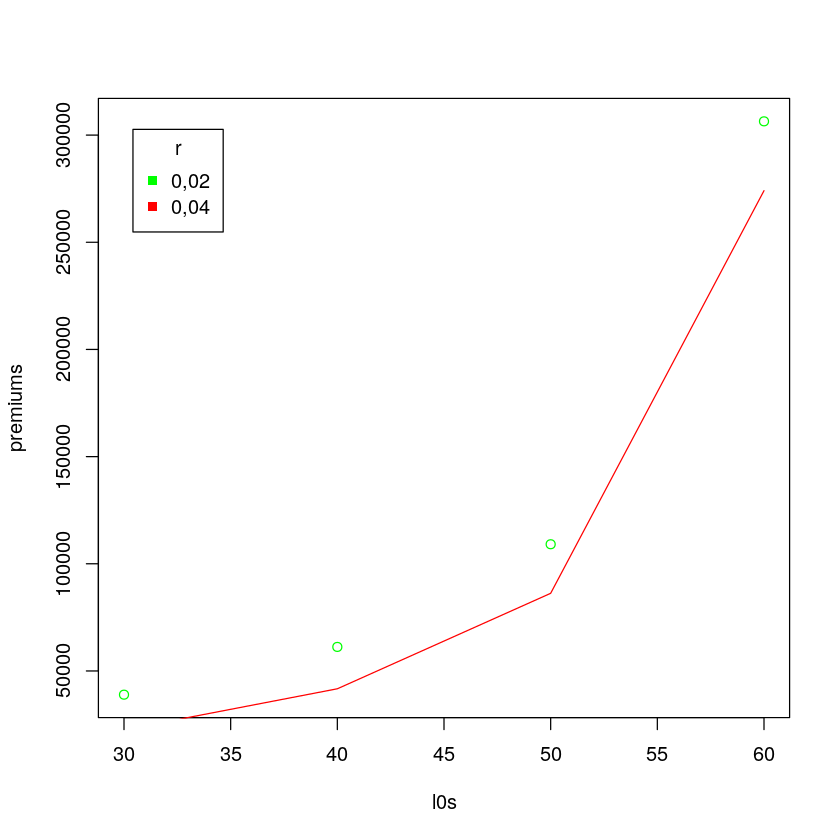

In [44]:
premium = function(lr, l0, s, le, r){
    "Calculates the premium of a pension scheme
     given input for starting age (lr), age at contract
     set up (l0), sum (s) and technical rate (r)."
    
    theta0 = .009
    theta1 = .000046
    theta2 = .0908
    d = 1./(1+r)
    
    numerator = 0
    l = l0
    for (k in (lr - l0):(le - l0)){
        logP = -theta0*k - theta1/theta2*(exp(theta2*k) - 1)*exp(theta2*l)
        numerator = numerator + d^k*exp(logP)
        l = l +1
    numerator = s*numerator
    }        
    
    denominator = 0
    l = l0
    for (k in (0):(lr - l0 -1)){
        logP = -theta0*k - theta1/theta2*(exp(theta2*k) - 1)*exp(theta2*l)
        denominator = denominator + d^k*exp(logP)
        l = l +1
    }    
    
    pi = numerator/denominator
    return(pi)
}

simulatePension = function(rs, l0s){
    "Runs the pension scheme for different
     technical rates and different starting
     ages"
    
    colors <- c("green", "red", "blue")
    rNumber = 1
    for (r in rs){
        premiums = rep(0, length(l0s))
        counter = 1
        for (l0 in l0s){
            pi = premium(lr, l0, s, le, r)
            premiums[counter] = pi
            counter = counter + 1
        }
        if (rNumber == 1){
            plot(l0s, premiums,  col=colors[rNumber])
        }
        else{
            lines(l0s, premiums, col=colors[rNumber])
        }
        rNumber = rNumber + 1
    }
    legend("topleft", inset=.05, title="r", legend=rs, pch=15, col = colors);
}

# Input
lr = 67
s = 1.5
le = 100
rs = c(.02, .04)
l0s = c(30, 40, 50, 60)

# Run
out = premium(lr, l0, s, le, r)
simulatePension(rs, l0s)

Premiums increase with age of person at the time when the contract is set up. This reflects the fact that there will be fewer years for this person to pay before he or she receives the pension. <br>

The premium is reduced with the tecnical rate. The value of future payment streams is reduced with higher technical rate. Hence the premium is reduced to obtain break even.

# References
Bølviken, E. (2014). Computation and modelling in insurance and finance. Cambridge University Press.